In [2]:
import random

import networkx as nx
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder




In [3]:
df = pd.read_csv("ca-IMDB.edges", sep=' ')
df.head()

,405632,1
0,303789,2
1,364797,2
2,31020,3
3,240622,3
4,225433,4


In [4]:
G = nx.from_pandas_edgelist(df, "0", "1")

KeyError: '0'

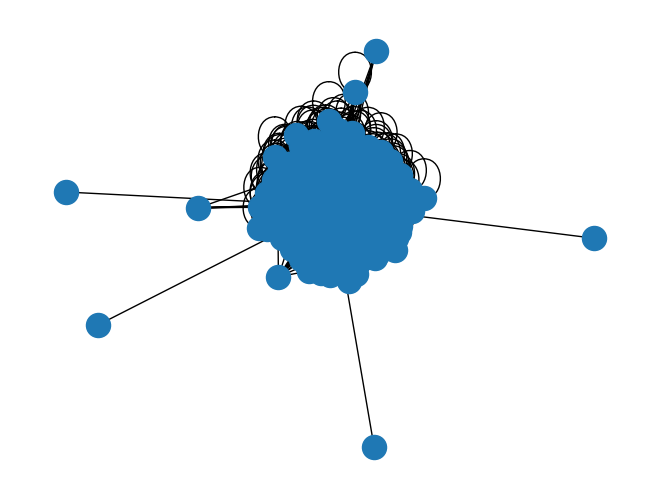

In [4]:
nx.draw(G)

In [5]:
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweeness_centrality = nx.betweenness_centrality(G)

In [6]:
len(degree_centrality)

492

In [7]:
data = pd.DataFrame({"degree":[], "closeness":[], "betwennes":[], "influence":[]})

In [8]:
for d, c, b in zip(list(degree_centrality.values()),list(closeness_centrality.values()),list(betweeness_centrality.values())):
    included = [d,c,b, (d+c+b)/3]
    data.loc[len(data)] = included

In [9]:
avg_influence = data['influence'].mean()
data.loc[data['influence'] >=2*avg_influence , 'influence'] = 1
data.loc[data['influence'] <2*avg_influence , 'influence'] = 0

In [9]:
data.to_csv("Data.csv")

In [10]:
data.head()

,degree,closeness,betwennes,influence
0,0.205703,0.556059,0.000129,0.253963
1,0.236253,0.566975,0.000164,0.267797
2,0.236253,0.565668,0.000168,0.267363
3,0.574338,0.699430,0.002255,0.425341
4,0.549898,0.687675,0.002302,0.413292


In [11]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values

In [12]:
def Scaling(X):
    scaler = StandardScaler()
    X=scaler.fit_transform(X)
    return X

In [13]:
X = Scaling(X)

In [14]:
over= RandomOverSampler()
X,Y= over.fit_resample(X,Y)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [141]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(9, activation='relu'),
    tf.keras.layers.Dense(9, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')])

In [17]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                         loss=tf.keras.losses.BinaryCrossentropy(),
                            metrics=['accuracy'])

In [18]:
model.evaluate(X_train,y_train)

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5144 - loss: 0.6812


[0.6825947165489197, 0.4902777671813965]

In [19]:
model.fit(X_train, y_train, batch_size=16, epochs=200,)

Epoch 1/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7080 - loss: 0.6426
Epoch 2/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9759 - loss: 0.4970
Epoch 3/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9520 - loss: 0.3828
Epoch 4/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9596 - loss: 0.2870
Epoch 5/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9671 - loss: 0.2169
Epoch 6/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9754 - loss: 0.1749
Epoch 7/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9808 - loss: 0.1158
Epoch 8/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9803 - loss: 0.0980
Epoch 9/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9796 - loss: 0.0836
Epoch 10/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9802 - loss: 0.0641
Epoch 11/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9874 - loss: 0.0595
Epoch 12/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

In [20]:
model.evaluate(X_test, y_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9964 - loss: 0.0122 


[0.01737295463681221, 0.9958333373069763]

In [21]:
X

array([[-0.65261575, -0.59013755, -0.40266846],
       [-0.51681515, -0.48985645, -0.39070992],
       [-0.51681515, -0.50185811, -0.38965137],
       ...,
       [ 2.82387974,  3.34100454,  4.25395666],
       [ 2.75145275,  3.19836818,  3.41818844],
       [ 2.79671962,  3.28698315,  3.40603042]])

In [22]:
X

array([[-0.65261575, -0.59013755, -0.40266846],
       [-0.51681515, -0.48985645, -0.39070992],
       [-0.51681515, -0.50185811, -0.38965137],
       ...,
       [ 2.82387974,  3.34100454,  4.25395666],
       [ 2.75145275,  3.19836818,  3.41818844],
       [ 2.79671962,  3.28698315,  3.40603042]])

In [23]:
len(Y[Y==0])

480

In [24]:
for i in Y:
    print(i)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [25]:
df = pd.read_csv("econ-beause.mtx", sep=' ')
df.head()

,Source,Target,weight
0,6,1,34.099991
1,7,1,1843.599900
2,19,1,191.599990
3,25,1,0.500000
4,63,1,51.699997


In [26]:
dt = pd.read_csv("econ-psmigr1.mtx", sep=' ')

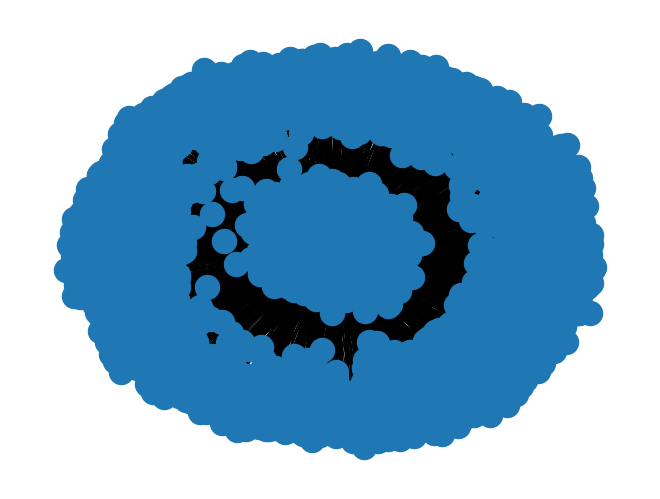

In [27]:
Gt = nx.from_pandas_edgelist(dt, "Source", "Target")
nx.draw(Gt)

In [28]:
degree_centrality_t = nx.degree_centrality(Gt)
closeness_centrality_t = nx.closeness_centrality(Gt)
betweeness_centrality_t = nx.betweenness_centrality(Gt)

In [29]:
print(degree_centrality_t)

{1: 0.013599105812220567, 5358: 0.00018628912071535022, 22: 0.41337555886736216, 19: 0.4353576751117735, 60: 0.17865126676602086, 129: 0.05923994038748137, 8: 0.5445230998509687, 11: 0.45603576751117736, 84: 0.11233233979135618, 9: 0.4903129657228018, 55: 0.2013785394932936, 6: 0.5612891207153502, 131: 0.05663189269746647, 120: 0.07023099850968703, 69: 0.17082712369597616, 33: 0.3479880774962742, 23: 0.40517883755588674, 269: 0.020678092399403873, 130: 0.05700447093889717, 29: 0.36885245901639346, 14: 0.5055886736214605, 26: 0.3910208643815201, 240: 0.028129657228017885, 1285: 0.005961251862891207, 20: 0.4333084947839046, 75: 0.13002980625931446, 13: 0.4996274217585693, 76: 0.139903129657228, 17: 0.43889716840536513, 68: 0.15257078986587183, 10: 0.455290611028316, 24: 0.4018256333830104, 64: 0.1631892697466468, 30: 0.3651266766020864, 38: 0.2922876304023845, 41: 0.2846497764530551, 63: 0.1650521609538003, 42: 0.28055141579731746, 28: 0.38561847988077497, 44: 0.2548435171385991, 169: 0.

In [30]:
print(len(degree_centrality_t))
print(len(closeness_centrality_t))

5369
5369


In [31]:
data_t = pd.DataFrame({"degree":[], "closeness":[], "betwennes":[], "influence":[]})

In [32]:
for d, c, b in zip(list(degree_centrality_t.values()),list(closeness_centrality_t.values()),list(betweeness_centrality_t.values())):
    included = [d,c,b, (d+c+b)/3]
    data_t.loc[len(data_t)] = included
    print(included)

[0.013599105812220567, 0.42036021926389977, 0.0003754848600255631, 0.14477826997871532]
[0.00018628912071535022, 0.29596956497766996, 0.0, 0.0987186180327951]
[0.41337555886736216, 0.6193607938156225, 0.018321323854564284, 0.35035255884584965]
[0.4353576751117735, 0.6298990847218963, 0.02047309040699269, 0.3619099500802208]
[0.17865126676602086, 0.5062240663900415, 0.003626975399941175, 0.22950076951866782]
[0.05923994038748137, 0.4492050209205021, 0.0007551474421850947, 0.1697333695833895]
[0.5445230998509687, 0.6858310974830715, 0.033182361556150654, 0.4211788529633969]
[0.45603576751117736, 0.6391998094784472, 0.022995315275934194, 0.3727436307551863]
[0.11233233979135618, 0.4742887435942746, 0.0013220130327388187, 0.19598103213945653]
[0.4903129657228018, 0.6577625291018258, 0.026670381219347276, 0.3915819586813249]
[0.2013785394932936, 0.5159554017685506, 0.004575580134508345, 0.2406365071321175]
[0.5612891207153502, 0.6947967900595392, 0.03544625840380769, 0.4305107230595657]
[0.

In [33]:
avg_influence = data_t['influence'].mean()
data_t.loc[data_t['influence'] >=2*avg_influence , 'influence'] = 1
data_t.loc[data_t['influence'] <2*avg_influence , 'influence'] = 0

In [34]:
data_t.head()

,degree,closeness,betwennes,influence
0,0.013599,0.420360,0.000375,0.0
1,0.000186,0.295970,0.000000,0.0
2,0.413376,0.619361,0.018321,1.0
3,0.435358,0.629899,0.020473,1.0
4,0.178651,0.506224,0.003627,0.0


In [35]:
X = data_t.iloc[:, :-1].values
Y = data_t.iloc[:, -1].values

In [36]:
X = Scaling(X)

In [37]:
over= RandomOverSampler()
X,Y= over.fit_resample(X,Y)

In [38]:
Y[Y==1]

array([1., 1., 1., ..., 1., 1., 1.])

In [39]:
Y[Y==0]

array([0., 0., 0., ..., 0., 0., 0.])

In [40]:
data_t.head()

,degree,closeness,betwennes,influence
0,0.013599,0.420360,0.000375,0.0
1,0.000186,0.295970,0.000000,0.0
2,0.413376,0.619361,0.018321,1.0
3,0.435358,0.629899,0.020473,1.0
4,0.178651,0.506224,0.003627,0.0


In [41]:
model.evaluate(X,Y)

333/333 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9694 - loss: 0.2514


[0.6780983805656433, 0.9192184805870056]

In [42]:
model.evaluate(X_test, y_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9964 - loss: 0.0122 


[0.01737295463681221, 0.9958333373069763]

In [43]:
len(degree_centrality_t)

5369

In [5]:
data_t.to_csv("Data_t.csv")

NameError: name 'data_t' is not defined

In [45]:
Y[Y==1]

array([1., 1., 1., ..., 1., 1., 1.])

TypeError: iteration over a 0-d array

In [4]:
data = pd.read_csv("Data_t.csv")
data.head()

NameError: name 'pd' is not defined

In [44]:
data.iloc[85]

degree       0.995927
closeness    0.995943
betwennes    0.031017
influence    1.000000
Name: 85, dtype: float64

In [143]:
X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values

In [17]:
len(y)

492

In [144]:
X = Scaling(X)
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.25, random_state=42)

In [174]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(9, activation='relu'),
    tf.keras.layers.Dense(9, activation='relu'),
    tf.keras.layers.Dense(9, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                         loss=['mean_squared_error'],
                            metrics=['mse', 'mae', 'mape'])

In [175]:
model.build((None, 3))

In [176]:
model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_53 (Dense)                │ (None, 9)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 9)              │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 9)              │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 1)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 226 (904.00 B)

 Trainable params: 226 (904.00 B)

 Non-trainable params: 0 (0.00 B)

In [177]:
model.evaluate(X_train, y_train)

126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0543 - mae: 0.2126 - mape: 204619312.0000 - mse: 0.0543


[0.0560811385512352, 0.0560811385512352, 0.21435600519180298, 205129952.0]

In [117]:
len(y_train)

4026

In [178]:
model.fit(X_train, y_train, epochs = 10000, batch_size = 800)

Epoch 1/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0516 - mae: 0.2032 - mape: 193420512.0000 - mse: 0.0516
Epoch 2/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0297 - mae: 0.1471 - mape: 139247168.0000 - mse: 0.0297 
Epoch 3/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0176 - mae: 0.1027 - mape: 95781008.0000 - mse: 0.0176  
Epoch 4/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0120 - mae: 0.0721 - mape: 64623868.0000 - mse: 0.0120 
Epoch 5/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0098 - mae: 0.0518 - mape: 44137308.0000 - mse: 0.0098 
Epoch 6/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0089 - mae: 0.0389 - mape: 31375034.0000 - mse: 0.0089 
Epoch 7/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0071 - mae: 0.0304 - mape: 24132542.0000 - mse: 0.0071 
Epoch 8/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0086 - mae: 0.0296 - mape: 21735456.0000 - mse: 0.0086  
Epoch 9/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.

In [179]:
model.evaluate(X_test, y_test)

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1436e-04 - mae: 0.0011 - mape: 484789.8750 - mse: 2.1436e-04


[0.00019942417566198856,
 0.00019942417566198856,
 0.0010733597446233034,
 489345.09375]

In [180]:
d_t = pd.read_csv("Data.csv")
#d_t = d_t.drop("Unnamed: 0", axis=1)
d_t.head()

,degree,closeness,betwennes,influence
0,0.205703,0.556059,0.000129,0.048812
1,0.236253,0.566975,0.000164,0.055971
2,0.236253,0.565668,0.000168,0.055948
3,0.574338,0.699430,0.002255,0.149786
4,0.549898,0.687675,0.002302,0.145963


In [181]:
X_t = d_t.iloc[:,:-1].values

In [170]:
X_t

array([[2.05702648e-01, 5.56058890e-01, 1.28748547e-04],
       [2.36252546e-01, 5.66974596e-01, 1.64374798e-04],
       [2.36252546e-01, 5.65668203e-01, 1.67528384e-04],
       ...,
       [2.03665988e-03, 4.99491353e-01, 0.00000000e+00],
       [2.03665988e-03, 4.99491353e-01, 0.00000000e+00],
       [2.03665988e-03, 4.99491353e-01, 0.00000000e+00]])

In [182]:
X_t = Scaling(X_t)

In [183]:
y_pred = model.predict(X_t)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [184]:
print(max(y_pred))

[0.01811475]


In [185]:
from Topsis import Topsis
degree = d_t['degree'].values
closeness = d_t['closeness'].values
betwennes = d_t['betwennes'].values
evaluation_matrix = np.array([0,0,0])
for d, c, b in zip(degree, closeness, betwennes):
    included = [d, c, b]
    included = np.array(included)
    evaluation_matrix = np.vstack((evaluation_matrix, included))
evaluation_matrix = evaluation_matrix[1:]
evaluation_matrix

array([[2.05702648e-01, 5.56058890e-01, 1.28748547e-04],
       [2.36252546e-01, 5.66974596e-01, 1.64374798e-04],
       [2.36252546e-01, 5.65668203e-01, 1.67528384e-04],
       ...,
       [2.03665988e-03, 4.99491353e-01, 0.00000000e+00],
       [2.03665988e-03, 4.99491353e-01, 0.00000000e+00],
       [2.03665988e-03, 4.99491353e-01, 0.00000000e+00]])

In [186]:
weights = [1, 1, 1]

'''
    if higher value is preferred - True
    if lower value is preferred - False
    '''
criterias = np.array([True, True, True])
t = Topsis(evaluation_matrix, weights, criterias)

best = t.calc()
model.evaluate(X_t, best)



16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0344 - mae: 0.1328 - mape: 28395.8145 - mse: 0.0344


[0.019983947277069092, 0.019983947277069092, 0.0967240035533905, 240636.453125]

In [187]:
print(max(best))

1.0


In [188]:
max(y_pred)

array([0.01811475], dtype=float32)

In [189]:
best[85]

1.0

In [190]:
y_pred[85]

array([-0.22406073], dtype=float32)